In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [336]:
from pandas_datareader import data, wb
import datetime

In [337]:
start = pd.to_datetime('2000-02-04')
end = pd.to_datetime('2020-11-23')

In [338]:
df = data.DataReader('SPY', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-02-04,144.00000,142.125000,143.18750,142.59375,4925400.0,96.637230
2000-02-07,142.78125,141.437500,142.56250,142.37500,5845800.0,96.488983
2000-02-08,144.56250,143.625000,143.96875,144.31250,4936400.0,97.802017
2000-02-09,144.46875,141.265625,144.46875,141.28125,8511500.0,95.747704
2000-02-10,142.56250,140.875000,141.62500,141.56250,6690600.0,95.938324


In [339]:
df['Open']

Date
2000-02-04    143.187500
2000-02-07    142.562500
2000-02-08    143.968750
2000-02-09    144.468750
2000-02-10    141.625000
                 ...    
2020-11-17    359.970001
2020-11-18    360.910004
2020-11-19    355.600006
2020-11-20    357.500000
2020-11-23    357.279999
Name: Open, Length: 5235, dtype: float64

In [340]:
df['Buy'] = df['Open'] < df['Close']

In [341]:
df

,High,Low,Open,Close,Volume,Adj Close,Buy
Date,,,,,,,
2000-02-04,144.000000,142.125000,143.187500,142.593750,4925400.0,96.637230,False
2000-02-07,142.781250,141.437500,142.562500,142.375000,5845800.0,96.488983,False
2000-02-08,144.562500,143.625000,143.968750,144.312500,4936400.0,97.802017,True
2000-02-09,144.468750,141.265625,144.468750,141.281250,8511500.0,95.747704,False
2000-02-10,142.562500,140.875000,141.625000,141.562500,6690600.0,95.938324,False
...,...,...,...,...,...,...,...
2020-11-17,361.920013,358.339996,359.970001,360.619995,66111000.0,360.619995,True
2020-11-18,361.500000,356.239990,360.910004,356.279999,70591300.0,356.279999,False
2020-11-19,358.179993,354.149994,355.600006,357.779999,59940900.0,357.779999,True


In [342]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Buy          0
dtype: int64

In [343]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,5235.0,1.655203e+02,6.619707e+01,7.000000e+01,1.173150e+02,1.393600e+02,2.077900e+02,3.643800e+02
Low,5235.0,1.634749e+02,6.571497e+01,6.710000e+01,1.155300e+02,1.373281e+02,2.055600e+02,3.595900e+02
Open,5235.0,1.645457e+02,6.597627e+01,6.795000e+01,1.163150e+02,1.383750e+02,2.067200e+02,3.639700e+02
Close,5235.0,1.645458e+02,6.597687e+01,6.811000e+01,1.164950e+02,1.382200e+02,2.067000e+02,3.625700e+02
Volume,5235.0,1.123535e+08,9.757470e+07,1.436600e+06,4.905280e+07,8.323440e+07,1.495438e+08,8.710263e+08
Adj Close,5235.0,1.406289e+02,7.352502e+01,5.373194e+01,8.715988e+01,1.071212e+02,1.870728e+02,3.625700e+02


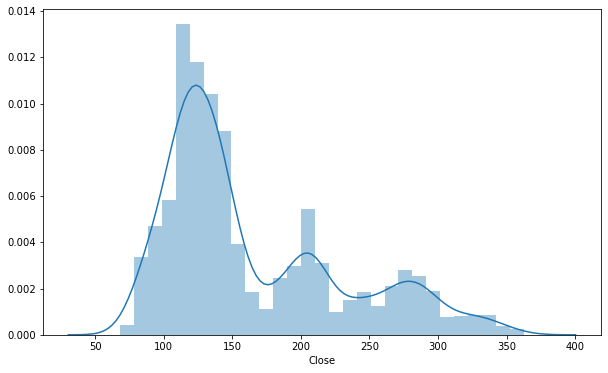

In [344]:
plt.figure(figsize=(10,6))
sns.distplot(df['Close'])

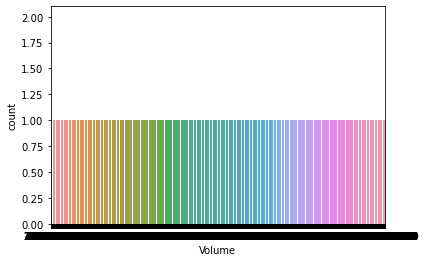

In [345]:
sns.countplot(df['Volume'])

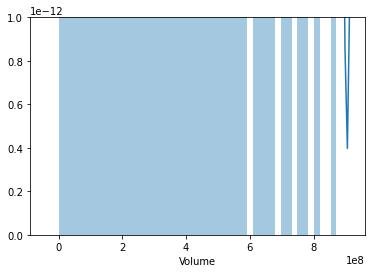

In [346]:
sns.distplot(df['Volume'])

In [347]:
df.corr()['Close'].sort_values()

Volume      -0.161700
Buy          0.023470
Adj Close    0.995345
Open         0.999731
High         0.999811
Low          0.999835
Close        1.000000
Name: Close, dtype: float64

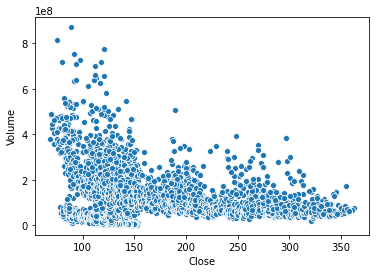

In [348]:
sns.scatterplot(x='Close', y='Volume', data=df)

In [349]:
df.sort_values('Close', ascending=False)

,High,Low,Open,Close,Volume,Adj Close,Buy
Date,,,,,,,
2020-11-16,362.779999,359.589996,360.980011,362.570007,74541100.0,362.570007,True
2020-11-17,361.920013,358.339996,359.970001,360.619995,66111000.0,360.619995,True
2020-11-13,358.899994,354.709991,355.269989,358.100006,62892200.0,358.100006,True
2020-11-19,358.179993,354.149994,355.600006,357.779999,59940900.0,357.779999,True
2020-09-02,358.750000,353.429993,354.670013,357.700012,69540000.0,356.273865,True
...,...,...,...,...,...,...,...
2009-03-02,73.919998,70.370003,72.519997,70.599998,426452600.0,55.696281,False
2009-03-03,71.699997,69.639999,71.610001,70.070000,443761000.0,55.278164,False
2009-03-06,70.449997,67.099998,69.400002,68.919998,490470000.0,54.370941,False


In [350]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2000-02-04
1      2000-02-07
2      2000-02-08
3      2000-02-09
4      2000-02-10
          ...    
5230   2020-11-17
5231   2020-11-18
5232   2020-11-19
5233   2020-11-20
5234   2020-11-23
Name: Date, Length: 5235, dtype: datetime64[ns]

In [351]:
df['year'] = df['Date'].apply(lambda date: date.year)
df['month'] = df['Date'].apply(lambda date: date.month)

In [352]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Buy,year,month
0,2000-02-04,144.000000,142.125000,143.187500,142.593750,4925400.0,96.637230,False,2000,2
1,2000-02-07,142.781250,141.437500,142.562500,142.375000,5845800.0,96.488983,False,2000,2
2,2000-02-08,144.562500,143.625000,143.968750,144.312500,4936400.0,97.802017,True,2000,2
3,2000-02-09,144.468750,141.265625,144.468750,141.281250,8511500.0,95.747704,False,2000,2
4,2000-02-10,142.562500,140.875000,141.625000,141.562500,6690600.0,95.938324,False,2000,2
...,...,...,...,...,...,...,...,...,...,...
5230,2020-11-17,361.920013,358.339996,359.970001,360.619995,66111000.0,360.619995,True,2020,11
5231,2020-11-18,361.500000,356.239990,360.910004,356.279999,70591300.0,356.279999,False,2020,11
5232,2020-11-19,358.179993,354.149994,355.600006,357.779999,59940900.0,357.779999,True,2020,11
5233,2020-11-20,357.720001,355.250000,357.500000,355.329987,70417300.0,355.329987,False,2020,11


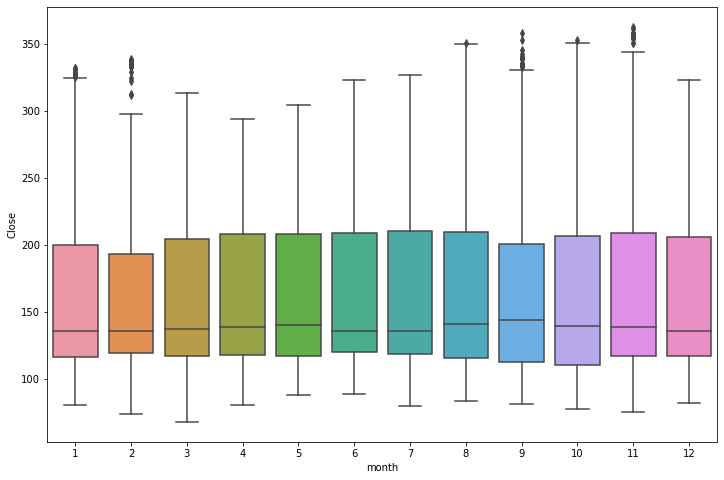

In [353]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='Close', data=df)

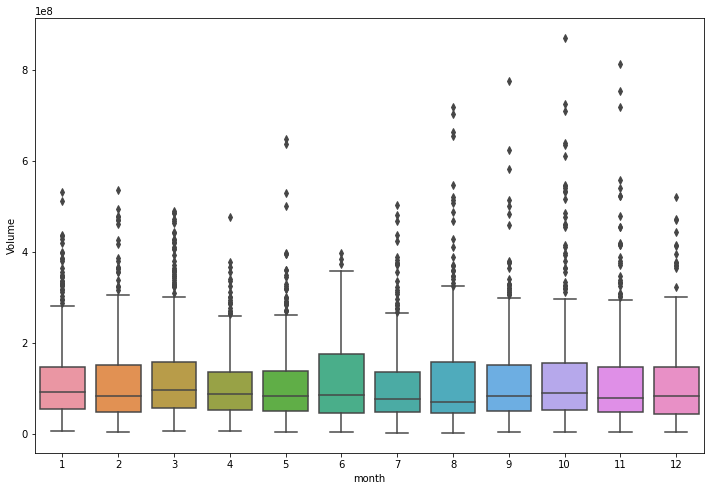

In [354]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='Volume', data=df)

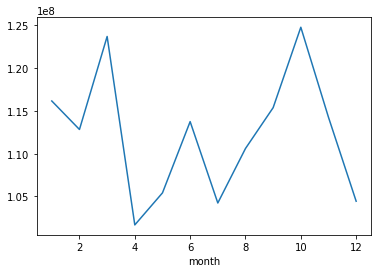

In [355]:
df.groupby('month').mean()['Volume'].plot()

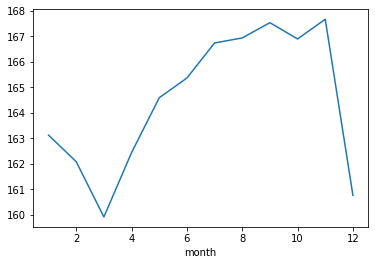

In [356]:
df.groupby('month').mean()['Close'].plot()

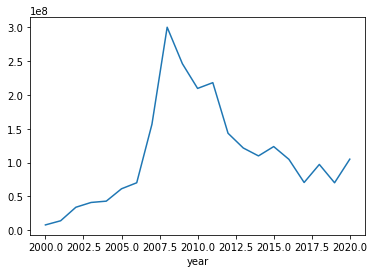

In [357]:
df.groupby('year').mean()['Volume'].plot()

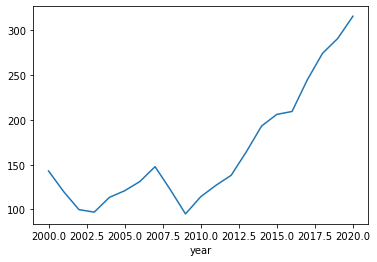

In [358]:
df.groupby('year').mean()['Close'].plot()

In [359]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,Buy,year,month
0,2000-02-04,144.000000,142.125000,143.187500,142.593750,4925400.0,96.637230,False,2000,2
1,2000-02-07,142.781250,141.437500,142.562500,142.375000,5845800.0,96.488983,False,2000,2
2,2000-02-08,144.562500,143.625000,143.968750,144.312500,4936400.0,97.802017,True,2000,2
3,2000-02-09,144.468750,141.265625,144.468750,141.281250,8511500.0,95.747704,False,2000,2
4,2000-02-10,142.562500,140.875000,141.625000,141.562500,6690600.0,95.938324,False,2000,2
...,...,...,...,...,...,...,...,...,...,...
5230,2020-11-17,361.920013,358.339996,359.970001,360.619995,66111000.0,360.619995,True,2020,11
5231,2020-11-18,361.500000,356.239990,360.910004,356.279999,70591300.0,356.279999,False,2020,11
5232,2020-11-19,358.179993,354.149994,355.600006,357.779999,59940900.0,357.779999,True,2020,11
5233,2020-11-20,357.720001,355.250000,357.500000,355.329987,70417300.0,355.329987,False,2020,11


In [360]:
X = df[['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Buy', 'year', 'month']].values
y = df['Close'].values

In [361]:
from sklearn.model_selection import train_test_split

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [363]:
from sklearn.preprocessing import MinMaxScaler

In [364]:
scaler = MinMaxScaler()

In [365]:
X_train = scaler.fit_transform(X_train)

In [366]:
X_test = scaler.transform(X_test)

In [367]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [368]:
X_train.shape

(3664, 8)

In [369]:
model = Sequential()
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [370]:
model.compile(optimizer='adam', loss='mse')

In [371]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
29/29 [==============================] - 0s 4ms/step - loss: 31261.2461 - val_loss: 31740.8164
Epoch 2/400
29/29 [==============================] - 0s 929us/step - loss: 31184.2559 - val_loss: 31625.7266
Epoch 3/400
29/29 [==============================] - 0s 1ms/step - loss: 31021.8887 - val_loss: 31383.6797
Epoch 4/400
29/29 [==============================] - 0s 997us/step - loss: 30649.1836 - val_loss: 30805.8770
Epoch 5/400
29/29 [==============================] - 0s 964us/step - loss: 29788.9062 - val_loss: 29527.6562
Epoch 6/400
29/29 [==============================] - 0s 1ms/step - loss: 28001.0586 - val_loss: 27010.6680
Epoch 7/400
29/29 [==============================] - 0s 963us/step - loss: 24732.4180 - val_loss: 22703.7578
Epoch 8/400
29/29 [==============================] - 0s 997us/step - loss: 19589.2773 - val_loss: 16494.2988
Epoch 9/400
29/29 [==============================] - 0s 997us/step - loss: 12906.8574 - val_loss: 9348.6484
Epoch 10/400
29/29 [======

29/29 [==============================] - 0s 963us/step - loss: 17.0625 - val_loss: 17.1089
Epoch 80/400
29/29 [==============================] - 0s 963us/step - loss: 16.2671 - val_loss: 16.3370
Epoch 81/400
29/29 [==============================] - 0s 963us/step - loss: 15.5132 - val_loss: 15.6109
Epoch 82/400
29/29 [==============================] - 0s 964us/step - loss: 14.8019 - val_loss: 14.9360
Epoch 83/400
29/29 [==============================] - 0s 1ms/step - loss: 14.1345 - val_loss: 14.3098
Epoch 84/400
29/29 [==============================] - 0s 1ms/step - loss: 13.5139 - val_loss: 13.6791
Epoch 85/400
29/29 [==============================] - 0s 1ms/step - loss: 12.9037 - val_loss: 13.1021
Epoch 86/400
29/29 [==============================] - 0s 997us/step - loss: 12.3623 - val_loss: 12.5673
Epoch 87/400
29/29 [==============================] - 0s 1ms/step - loss: 11.8176 - val_loss: 12.0466
Epoch 88/400
29/29 [==============================] - 0s 1ms/step - loss: 11.3238 - v

29/29 [==============================] - 0s 963us/step - loss: 1.4931 - val_loss: 1.5303
Epoch 160/400
29/29 [==============================] - 0s 963us/step - loss: 1.4690 - val_loss: 1.4977
Epoch 161/400
29/29 [==============================] - 0s 997us/step - loss: 1.4465 - val_loss: 1.4834
Epoch 162/400
29/29 [==============================] - 0s 963us/step - loss: 1.4166 - val_loss: 1.4385
Epoch 163/400
29/29 [==============================] - 0s 929us/step - loss: 1.3887 - val_loss: 1.4360
Epoch 164/400
29/29 [==============================] - 0s 963us/step - loss: 1.3620 - val_loss: 1.3864
Epoch 165/400
29/29 [==============================] - 0s 1ms/step - loss: 1.3383 - val_loss: 1.3636
Epoch 166/400
29/29 [==============================] - 0s 997us/step - loss: 1.3207 - val_loss: 1.3369
Epoch 167/400
29/29 [==============================] - 0s 997us/step - loss: 1.2993 - val_loss: 1.3142
Epoch 168/400
29/29 [==============================] - 0s 997us/step - loss: 1.2859 - val

29/29 [==============================] - 0s 963us/step - loss: 0.9900 - val_loss: 0.9619
Epoch 240/400
29/29 [==============================] - 0s 964us/step - loss: 0.9862 - val_loss: 0.9565
Epoch 241/400
29/29 [==============================] - 0s 929us/step - loss: 0.9872 - val_loss: 0.9551
Epoch 242/400
29/29 [==============================] - 0s 997us/step - loss: 0.9907 - val_loss: 1.0466
Epoch 243/400
29/29 [==============================] - 0s 997us/step - loss: 0.9941 - val_loss: 0.9530
Epoch 244/400
29/29 [==============================] - 0s 1ms/step - loss: 0.9778 - val_loss: 0.9525
Epoch 245/400
29/29 [==============================] - 0s 963us/step - loss: 0.9743 - val_loss: 0.9513
Epoch 246/400
29/29 [==============================] - 0s 1ms/step - loss: 0.9834 - val_loss: 0.9470
Epoch 247/400
29/29 [==============================] - 0s 997us/step - loss: 0.9734 - val_loss: 0.9585
Epoch 248/400
29/29 [==============================] - 0s 997us/step - loss: 0.9941 - val_l

29/29 [==============================] - 0s 963us/step - loss: 0.8712 - val_loss: 0.8358
Epoch 320/400
29/29 [==============================] - 0s 997us/step - loss: 0.8775 - val_loss: 0.8749
Epoch 321/400
29/29 [==============================] - 0s 963us/step - loss: 0.9139 - val_loss: 1.0002
Epoch 322/400
29/29 [==============================] - 0s 963us/step - loss: 0.8925 - val_loss: 0.8353
Epoch 323/400
29/29 [==============================] - 0s 997us/step - loss: 0.8567 - val_loss: 0.8560
Epoch 324/400
29/29 [==============================] - 0s 997us/step - loss: 0.8502 - val_loss: 0.8320
Epoch 325/400
29/29 [==============================] - 0s 963us/step - loss: 0.9157 - val_loss: 0.8272
Epoch 326/400
29/29 [==============================] - 0s 964us/step - loss: 0.8493 - val_loss: 0.8243
Epoch 327/400
29/29 [==============================] - 0s 997us/step - loss: 0.8471 - val_loss: 0.8481
Epoch 328/400
29/29 [==============================] - 0s 1ms/step - loss: 0.8983 - val

29/29 [==============================] - 0s 1ms/step - loss: 0.7698 - val_loss: 0.7449
Epoch 400/400
29/29 [==============================] - 0s 997us/step - loss: 0.7630 - val_loss: 0.7389


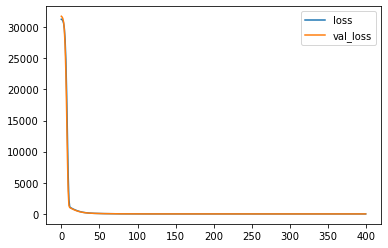

In [372]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [373]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [374]:
predictions = model.predict(X_test)

In [375]:
np.sqrt(mean_squared_error(y_test, predictions))

0.8595982983963649

In [376]:
mean_absolute_error(y_test, predictions)

0.5846210142216964

In [377]:
df['Close'].describe()

count    5235.000000
mean      164.545774
std        65.976871
min        68.110001
25%       116.494999
50%       138.220001
75%       206.699997
max       362.570007
Name: Close, dtype: float64

In [378]:
explained_variance_score(y_test, predictions)

0.9998334437126383

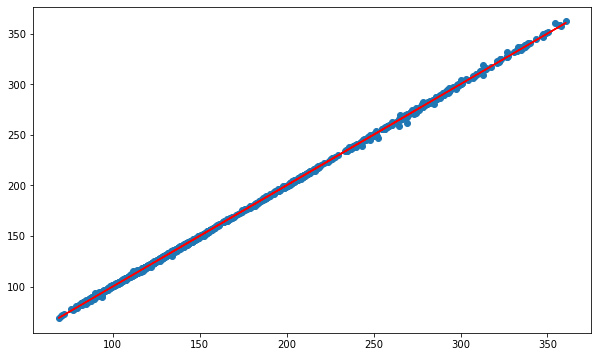

In [379]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [380]:
# TODO:: get day before data to predict current day
start = pd.to_datetime('2020-11-24')
end = pd.to_datetime('2020-11-24')
single_day = data.DataReader('SPY', 'yahoo', start, end)

In [381]:
single_day['Buy'] = single_day['Open'] < single_day['Close']

In [384]:
single_day = single_day.reset_index()
single_day['Date'] = pd.to_datetime(single_day['Date'])
single_day['Date']

0   2020-11-24
Name: Date, dtype: datetime64[ns]

In [385]:
single_day['year'] = single_day['Date'].apply(lambda date: date.year)
single_day['month'] = single_day['Date'].apply(lambda date: date.month)

,level_0,index,Date,High,Low,Open,Close,Volume,Adj Close,Buy,year,month
0,0,0,2020-11-24,363.809998,359.290009,360.209991,363.220001,62415900,363.220001,True,2020,11


In [393]:
single_day_close = single_day['Close']
single_day = single_day[['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Buy', 'year', 'month']]
single_day = scaler.transform(single_day.values.reshape(-1, 8))

In [394]:
model.predict(single_day)

array([[363.05783]], dtype=float32)

In [395]:
single_day_close

0    363.220001
Name: Close, dtype: float64